# UBER CAB CANCELLATION PREDICTION Using Data Science and ML

## Introduction:

For me personally, there were numerous occasions of not getting my cab or being cancelled and many reasons when I booked it from many services and I felt that there may be some kind of functionality which tells us about the cab cancellation rate so that we may not wait for the cab which may get cancelled or due to no cabs availability. Disclaimer: There is a booking option available to book in advance but for some people who want to travel urgently and not getting a cab on time, will go through a hell lot of struggle. So from many incidents that happened, I believe that this functionality in all the leading service providers will be a game changer and will help many people across the world who depend on this kind of transportation.

## Business Understanding:


- Quick Glance about the data. 

- How many book a cab from the city and from airport?

- How many people got their cabs and how many got cancelled?

- What will be my Cab cancellation rate If I want to book the cab at 6:30?


In [1]:
# Collecting the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

 # Loading dataset

In [2]:
import os
os.path

<module 'posixpath' from '/Users/kaushiktummalapalli/anaconda3/lib/python3.7/posixpath.py'>

## Quick Glance about the data:

In [3]:
# Our main data set:
df = pd.read_csv('Uber Request Data.csv')
df.head(20)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


**1. Get dimension of the data**

In [5]:
df.shape

(6745, 6)

**2. Get Information about dataset**
> - data types
- missing values
- percentage of missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [14]:
df.isnull().sum() # isnull command will return boolean values and sum will count the missing values

# Treatment about the missing data:
#And speaking about our problem, we don't require the driver id and drop time stamp as we are keen in understanding more about
#the number of requests which we can get through the required time stamp.


Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [9]:
df.isnull().sum()/len(df)

Request id           0.000000
Pickup point         0.000000
Driver id            0.392884
Status               0.000000
Request timestamp    0.000000
Drop timestamp       0.580282
dtype: float64

- Dataset consits of 6 Featues
- Request id = Unique
- Pickup Point = Categorical (Where dirver got pickup either in the city or airport
- Driver id = Each driver is given unique id
- Status = Status regarding trip wether it is completed or get canceled.
- Request timestamp = Which time it cab get booked.
- Drop timestamp = When book got droped

There are 2 columns with datatime format , 2 unique values columns, 2 categorical values

# Data Conversion
- converting data type proper datatime format for two columns

In [10]:
df.keys()

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [11]:
df['Request timestamp'] = df['Request timestamp'].astype(str)
df['Request timestamp'] = df['Request timestamp'].str.replace("/", "-")
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'],dayfirst=True)

In [12]:
df['Drop timestamp'] = df['Drop timestamp'].astype(str)
df['Drop timestamp'] = df['Drop timestamp'].str.replace("/", "-")
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'],dayfirst=True)

In [13]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


# Extracting
- requesting hour
- requesting day

In [14]:
req_hour = df['Request timestamp'].dt.hour
req_day = df['Request timestamp'].dt.day

In [15]:
# concatinate to data frame
df['req_hour'] = req_hour
df['req_day']= req_day

df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


# Univariet Analysis

- ***PICKUP POINT***

In [16]:
# Pickup point: Get number of categories in pickup point
df['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

## How many book a cab from the city and from airport?

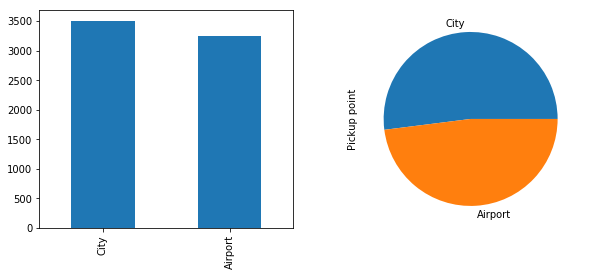

City       3507
Airport    3238
Name: Pickup point, dtype: int64

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['Pickup point'].value_counts().plot('bar')
plt.subplot(1,2,2)
df['Pickup point'].value_counts().plot('pie')
plt.show()

# Get Exact number
df['Pickup point'].value_counts()

# For the above question 

- From city there were 3507 requests 
- From Airport there were 3238 requests


Number of **pickup point** from City and Airport are almost equal. Hence we can get clear analysis regarding cancellation

- ***Driver ID***

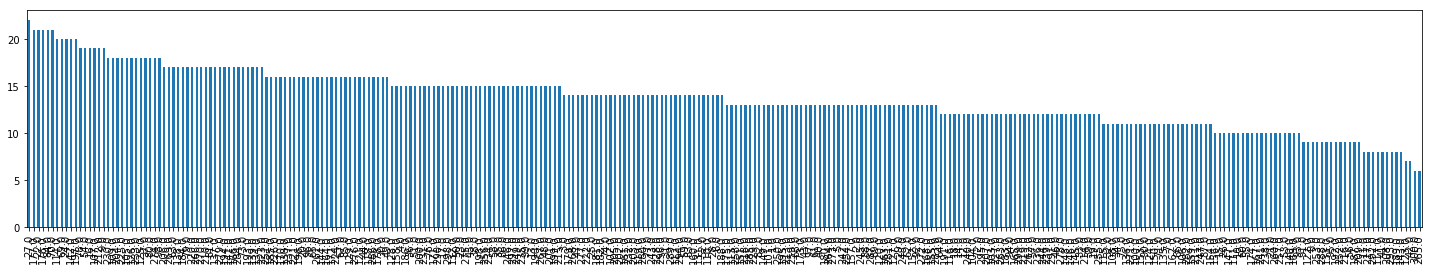

In [18]:
plt.figure(figsize=(25,4))
df['Driver id'].value_counts().plot('bar')
plt.show()

In [19]:
df['Driver id'].nunique()

300

Number of drivers who are working in **UBER** = 300 *members*

> most of the member are resonabily take drives more that 10

- ***Status***

In [20]:
df['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

# There are three categorical variables in Status coloumn: 
- Trip Completed
- Cancelled
- No Cars Available

In [9]:
names = list(df['Status'].value_counts().keys())
size = list(df['Status'].value_counts())

In [23]:
# Function for doughnut plot
def doughnut(size, names):
    """
    args:
        size: They are the ratio to which extent they have to extend.
        names: The labels that we have from the dataset
    returns:
        create donut plots with the given names and size

    """
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
    p=plt.gcf()
    p.gca().add_artist(my_circle)

## How many people got their cabs and how many got cancelled?


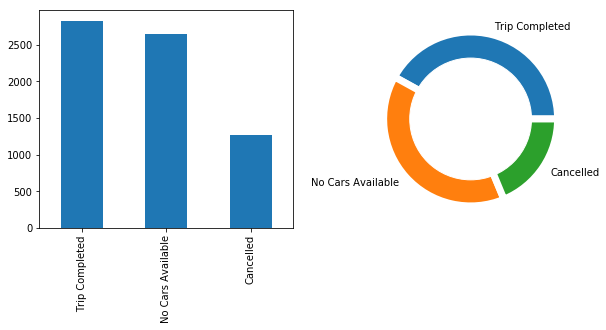

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['Status'].value_counts().plot('bar')
plt.subplot(1,2,2)
doughnut(size,names)
plt.show()

# Get Exact number
df['Status'].value_counts()

# For the above question 

- There were 2831 trips completed
- No cars available and cancelled totally add upto 3914 trips

- ***Requested Hours***

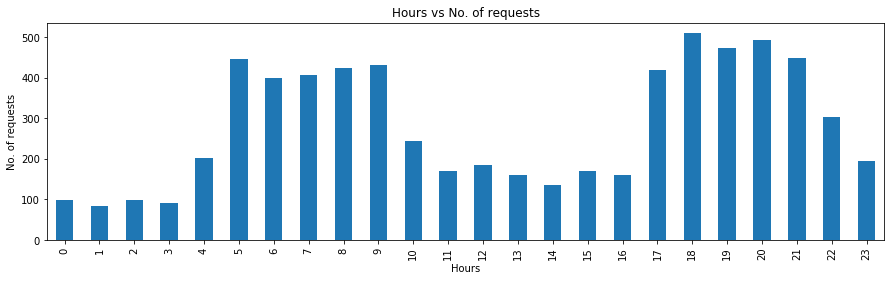

In [25]:
plt.figure(figsize=(15,4))
df['req_hour'].value_counts().sort_index().plot('bar')
plt.xlabel('Hours')
plt.ylabel('No. of requests')
plt.title('Hours vs No. of requests')
plt.show()

In [4]:
# Taking the useful columns and for those doing the necessary calculations so we can answer the questions we want:

In [53]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'req_hour', 'req_day',
       'total_sum', 'peak_time'],
      dtype='object')

In [54]:
l=sum(df["total_sum"][:24])

In [55]:
a=df["total_sum"][:24]

In [56]:
df["percentage"]=l//a
df["percentage"]=100-df["percentage"]
df["percentage"][:24]

0     32.0
1     21.0
2     32.0
3     27.0
4     67.0
5     85.0
6     84.0
7     84.0
8     85.0
9     85.0
10    73.0
11    61.0
12    64.0
13    58.0
14    51.0
15    61.0
16    58.0
17    84.0
18    87.0
19    86.0
20    87.0
21    85.0
22    78.0
23    66.0
Name: percentage, dtype: float64

In [57]:
data11=pd.Series({0:32,1:21,2:32,3:27,4:67,5:85,6:84,7:85,8:85,9:85,10:73,11:61,12:64,13:58,14:51,15:61,16:58,17:84,18:87,19:86,20:87,21:85,22:78,23:66})
data11.columns=["time","Can"]
data11.to_frame
data11.columns=["time","Can"]

In [58]:
df1=set(df["req_hour"])#"percentage"]

In [60]:
df1=df["percentage"][:23]

In [61]:
set(df1)

{21.0,
 27.0,
 32.0,
 51.0,
 58.0,
 61.0,
 64.0,
 67.0,
 73.0,
 78.0,
 84.0,
 85.0,
 86.0,
 87.0}

From above visualization it is understood that number of requests are high (peak hours) from
- 5 AM - 9 AM
- 5 PM - 10 PM

and rest all are normal traffic. So out of 24hr, 9hr are very peak hours for revenue perceptive

# Requested Days

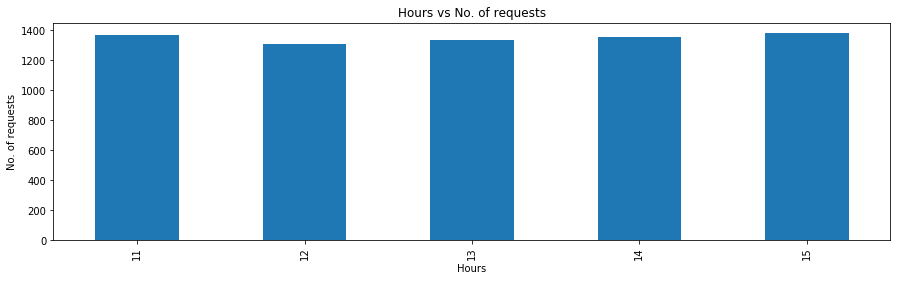

15    1381
11    1367
14    1353
13    1337
12    1307
Name: req_day, dtype: int64

In [27]:
plt.figure(figsize=(15,4))
df['req_day'].value_counts().sort_index().plot('bar')
plt.xlabel('Hours')
plt.ylabel('No. of requests')
plt.title('Hours vs No. of requests')
plt.show()

df['req_day'].value_counts()

In [37]:
df["total_sum"]=df_cross_tab.sum();

From above visualization all days has almost equal number of request

# Bivarient Analysis
> compare wrt to target vairable (status)

- Count

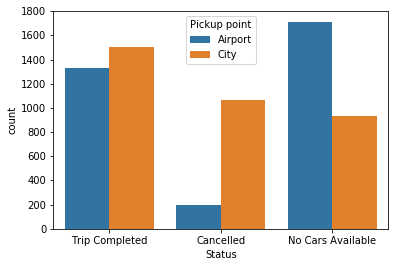

In [29]:
sns.countplot(hue='Pickup point',x='Status',data=df)

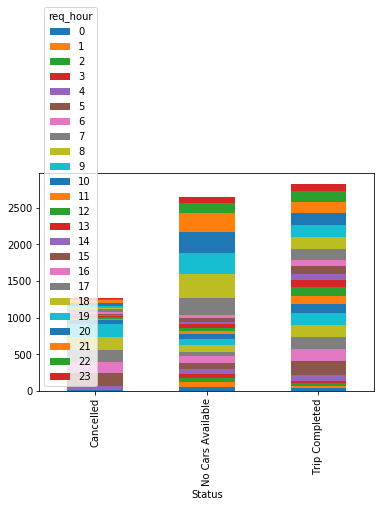

req_hour           0   1   2   3   4    5    6    7    8    9   ...  14   15  \
Status                                                          ...            
Cancelled           3   4   5   2  51  176  145  169  178  175  ...  11   21   
No Cars Available  56  56  57  56  74   84   86   63   90   83  ...  37   48   
Trip Completed     40  25  37  34  78  185  167  174  155  173  ...  88  102   

req_hour           16   17   18   19   20   21   22   23  
Status                                                    
Cancelled          22   35   24   24   41   42   12   10  
No Cars Available  46  232  322  283  290  265  138   81  
Trip Completed     91  151  164  166  161  142  154  103  

[3 rows x 24 columns]


In [30]:
df_cross_tab = pd.crosstab(df['Status'],df['req_hour'])
df_cross_tab.plot(kind='bar',stacked=True),plt.show()
print(df_cross_tab)

In [31]:
df["total_sum"]=df_cross_tab.sum()

In [87]:
df["peak_time"]=df["total_sum"]/np.sum(df.loc[(df['Status']=="Cancelled")|(df['Status']=="No Cars Available")])
#sum(df["Status"]=="Cancelled",df["Status"]== "No Cars Available");


In [85]:
df["total_sum"]

0        99.0
1        85.0
2        99.0
3        92.0
4       203.0
5       445.0
6       398.0
7       406.0
8       423.0
9       431.0
10      243.0
11      171.0
12      184.0
13      160.0
14      136.0
15      171.0
16      159.0
17      418.0
18      510.0
19      473.0
20      492.0
21      449.0
22      304.0
23      194.0
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
        ...  
6715      NaN
6716      NaN
6717      NaN
6718      NaN
6719      NaN
6720      NaN
6721      NaN
6722      NaN
6723      NaN
6724      NaN
6725      NaN
6726      NaN
6727      NaN
6728      NaN
6729      NaN
6730      NaN
6731      NaN
6732      NaN
6733      NaN
6734      NaN
6735      NaN
6736      NaN
6737      NaN
6738      NaN
6739      NaN
6740      NaN
6741      NaN
6742      NaN
6743      NaN
6744      NaN
Name: total_sum, Length: 6745, dtype: float64

In [86]:
df.head(24)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,total_sum,peak_time,percentage
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,99.0,99.0,32.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,85.0,85.0,21.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,99.0,99.0,32.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,92.0,92.0,27.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,203.0,203.0,67.0
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,445.0,445.0,85.0
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,398.0,398.0,84.0
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,406.0,406.0,84.0
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,423.0,423.0,85.0
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,431.0,431.0,85.0


In [15]:
def status_complete(status):
    """
    args: 
        status: For each and every booking there will be a status and we want to format this.
    output: 
        We will get the formatted status interms of 'Completed' and 'Not Completed'
    """
    if status == "Trip Completed":
        return "Completed"
    else:
        return "Not Completed"

In [39]:
df['complete'] = df['Status'].apply(status_complete)
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,complete
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Completed
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Completed
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Completed
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Completed
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Completed


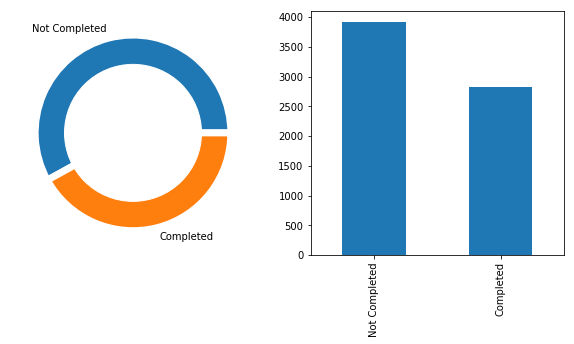

In [40]:
df['complete'].value_counts()
names = list(df['complete'].value_counts().keys())
count = list(df['complete'].value_counts())
plt.figure(figsize=(10,4.5))
plt.subplot(1,2,1)
doughnut(count,names)
plt.subplot(1,2,2)
df['complete'].value_counts().plot('bar')
plt.show()

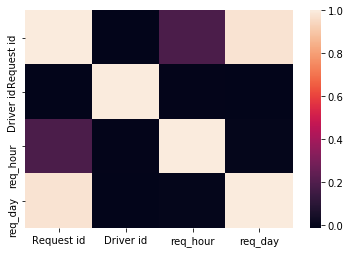

In [43]:
# To understand the correlation of the parameters before heading towards our modelling goal:
sns.heatmap(df.corr())

# After doing all the tweaking to our original data set we have converted the original data into the below formatted data for modelling:

In [111]:
import os
os.path

<module 'posixpath' from '/Users/kaushiktummalapalli/anaconda3/lib/python3.7/posixpath.py'>

In [90]:
dat=pd.read_csv("final.csv") # From the previous results that we obtained:

In [92]:
data_main=dat.iloc[:,1:]
data_main.columns

Index(['Percentage', 'Hour'], dtype='object')

In [142]:
data_main["Percentage"]

0     32
1     21
2     32
3     27
4     67
5     85
6     84
7     85
8     85
9     85
10    73
11    61
12    64
13    58
14    51
15    61
16    58
17    84
18    87
19    86
20    87
21    85
22    78
23    66
Name: Percentage, dtype: int64

In [144]:
data_main["Hour"]

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
Name: Hour, dtype: int64

In [145]:
data_main.shape

(24, 2)

In [147]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Percentage    24 non-null int64
Hour          24 non-null int64
dtypes: int64(2)
memory usage: 464.0 bytes


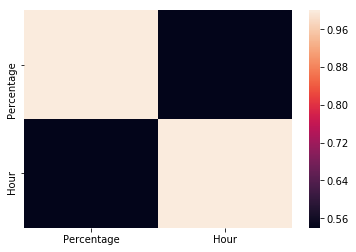

In [149]:
sns.heatmap(data_main.corr())

In [95]:
# Considering the target and the response variables:
X=data_main.iloc[:,-1].values
y=data_main.iloc[:,:-1].values
X = X.reshape(-1,1)
y =y.reshape(-1,1)

In [169]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

In [170]:
from sklearn.linear_model import LinearRegression

In [171]:
regressor=LinearRegression()

In [181]:
m=regressor.fit(X_train,y_train) 

In [173]:
y_pred=regressor.predict(X_test)

In [174]:
y_pred

array([[70.72010969],
       [68.96855576],
       [89.98720293],
       [75.97477148],
       [86.48409506],
       [53.20457038],
       [74.22321755],
       [91.73875686]])

In [175]:
y_test

array([[61],
       [73],
       [78],
       [51],
       [87],
       [21],
       [58],
       [66]])

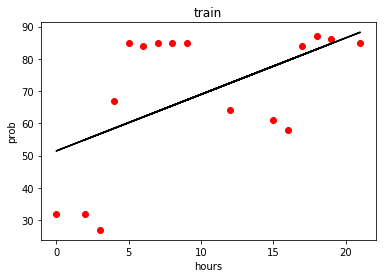

In [176]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='black')
plt.title("train")
plt.xlabel("hours")
plt.ylabel("prob")
plt.show()

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
%matplotlib inline

In [186]:
X = data_main['Hour']
y = data_main['Percentage']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             Percentage   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     9.046
Date:                Sun, 22 Mar 2020   Prob (F-statistic):            0.00648
Time:                        14:38:29   Log-Likelihood:                -102.52
No. Observations:                  24   AIC:                             209.0
Df Residuals:                      22   BIC:                             211.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.2800      7.167      6.736      0.0

/Users/kaushiktummalapalli/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [187]:
from sklearn.svm import SVR

In [207]:
regressor1=SVR(kernel='rbf')

In [229]:
X=data_main.iloc[:,-1].values
y=data_main.iloc[:,:-1].values
X = X.reshape(-1,1)
y =y.reshape(-1,1)

In [215]:
regressor.fit(X,y)

/Users/kaushiktummalapalli/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

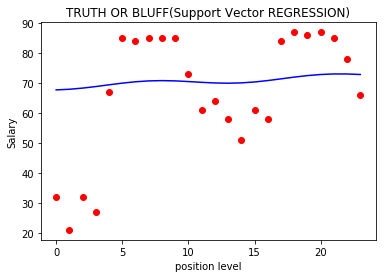

In [216]:
#Performing feature scaling:
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title("TRUTH OR BLUFF(Support Vector REGRESSION)")
plt.xlabel('position level')
plt.ylabel('Salary')
plt.show()

In [217]:
from sklearn.tree import DecisionTreeRegressor

In [218]:
regressor=DecisionTreeRegressor(random_state=0)

In [219]:
regressor.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

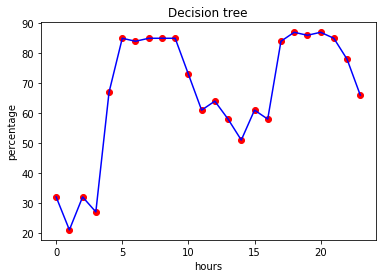

In [223]:
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title("Decision tree")
plt.xlabel('hours')
plt.ylabel('percentage')
plt.show()

In [224]:
new_value = np.array([[6.5]])
y_pred=regressor.predict(new_value)

# What will be my Cab cancellation rate If I want to book the cab at 6:30?


In [225]:
y_pred

array([84.])

## There is around 84% cab cancellation rate for that time

In [230]:
r2 = regressor.score(X,y)

In [231]:
r2

1.0